Model Accuracy: 0.9210526315789473

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


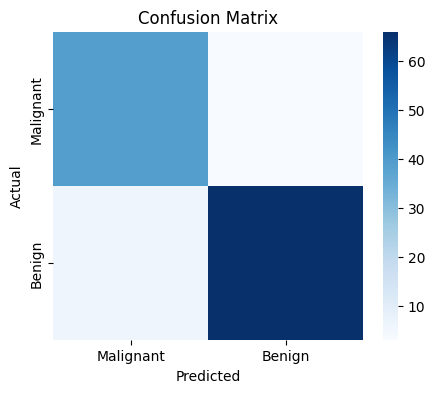


--- Breast Cancer Prediction ---

 Prediction: Benign (Not Cancerous) 


In [4]:
# --------------------------------------------------------------------------------------------------------------------------------------------
# Breast Cancer Prediction using Logistic Regression
# Features: mean radius, mean texture, mean perimeter,
#           mean area, mean smoothness
# Target: 0 (malignant), 1 (benign)
# Dataset: sklearn's breast cancer dataset
# Model: Logistic Regression
# Evaluation: Accuracy, Classification Report, Confusion Matrix
# -------------------------------------------------------------------------------------------------------------------------------------------


import pandas as pd                                                 # For data manipulation and analysis
from sklearn.datasets import load_breast_cancer                     # Load built-in breast cancer dataset
from sklearn.model_selection import train_test_split                # Split data into training and test sets
from sklearn.linear_model import LogisticRegression                 # Logistic Regression model for binary classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Tools for model evaluation
import seaborn as sns                                               # For data visualization (especially heatmaps)
import matplotlib.pyplot as plt                                     # For plotting graphs and charts


#-------------------------------------DATA---------------------------------------------------------------------------------------------------

# 1.Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target  # 0 - Malignant,    2 - benign

# Keep only 5 important features + target
df_small = df[["mean radius", "mean texture", "mean perimeter", "mean area" , "mean smoothness", "target"]]

# 2.Split dataset
x = df_small.drop(columns=["target"])
y = df_small["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2 , random_state=42, stratify=y
)

#----------------------------------MODEL CREATION------------------------------------------------------------------------------------------------

# 3.Train Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# 4.Evaluation
y_prod = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print("Model Accuracy:", accuracy_score(y_test, y_prod))
print("\nClassification Report:\n", classification_report(y_test, y_prod))

#---------------------------------EVALUATION---------------------------------------------------------------------------------------------------

# Confusion Matrix
cm = confusion_matrix(y_test, y_prod)
plt.figure(figsize=(5,4))
sns.heatmap(cm,cmap="Blues",
            xticklabels=["Malignant","Benign"], yticklabels=["Malignant","Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#------------------------------------------------PREDICTION---------------------------------------------------------------------------------

# 5. User Input Prediction
print("\n--- Breast Cancer Prediction ---")

mean_radius = float(input("Enter mean radius (e.g. 14.5): "))
mean_texture = float(input("Enter mean texture (e.g. 20.0): "))
mean_perimeter = float(input("Enter mean perimeter (e.g. 100.0): "))
mean_area = float(input("Enter mean area (e.g. 900.0): "))
mean_smoothness = float(input("Enter mean smoothness (e.g. 0.1): "))

# Create DataFrame for user input
user_data = {
    "mean radius": mean_radius,
    "mean texture": mean_texture,
    "mean perimeter": mean_perimeter,
    "mean area": mean_area,
    "mean smoothness": mean_smoothness
}
user_df = pd.DataFrame([user_data])

# Predict
prediction = model.predict(user_df)[0]

if prediction == 1:
    print(f"\n Prediction: Benign (Not Cancerous) ")
else:
    print(f"\nPrediction: Malignant (Cancerous) ")

Sample data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Accuracy: 92.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



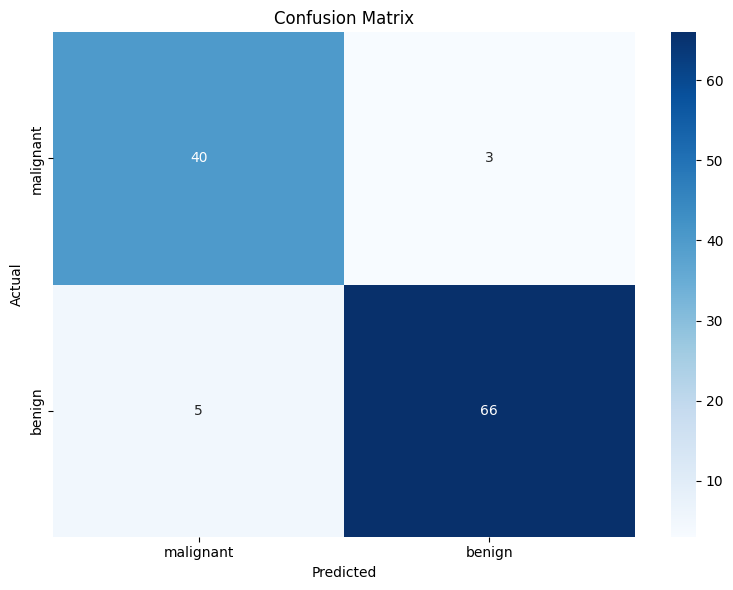

In [2]:
# --------------------------------------------------
# Breast Cancer Prediction using Logistic Regression
# Features: mean radius, mean texture, mean perimeter,
#           mean area, mean smoothness
# Target: 0 (malignant), 1 (benign)
# Dataset: sklearn's breast cancer dataset
# Model: Logistic Regression
# Evaluation: Accuracy, Classification Report, Confusion Matrix
# --------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------- DATA LOADING ------------------------ #
# 1. Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Keep only 5 important features + target
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
df_small = df[selected_features]

print("Sample data:")
print(df_small.head())

# ----------------------- DATA SPLITTING ------------------------ #
# 2. Split dataset into features and target
X = df_small.drop(columns='target')
y = df_small['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------- MODEL TRAINING ------------------------ #
# 3. Create and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# ----------------------- EVALUATION ------------------------ #
# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
